This notebook is a continuation of Capstone-AI-Ergonomics-Webcam-DataCollection-EDA

In this notebook, collected dataset will be trained by using:
- Logistic Regression
- Ridge Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Adaptive Boosting Classifier
- Decision Tree Classifier

Also, Pycaret will be used to train and compare models later on.

### Import Scikit Learn Model Training and Pycaret

In [1]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, f1_score, roc_auc_score, plot_roc_curve, roc_curve, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load Training Data

In [2]:
webcam_df = pd.read_csv('../Codes/new_webcam_coords_2.csv',index_col=[0])

In [3]:
webcam_df.head()

posture   distance        x1        y1        z1        v1        x2  \
0  straight  54.482725  0.540115  0.643918 -1.082978  0.999611  0.560545   
1  straight  52.867762  0.545043  0.646108 -1.093874  0.999447  0.562441   
2  straight  53.642567  0.544261  0.646108 -1.052980  0.999187  0.561833   
3  straight  52.867762  0.544072  0.646125 -1.001081  0.999030  0.561759   
4  straight  53.683076  0.542942  0.649676 -1.015812  0.998835  0.561096   

         y2        z2        v2        x3        y3        z3        v3  \
0  0.597951 -0.987799  0.999653  0.574086  0.600362 -0.988065  0.999710   
1  0.598812 -1.000388  0.999513  0.575351  0.601176 -1.000781  0.999584   
2  0.599122 -0.964017  0.999303  0.575026  0.601721 -0.964510  0.999398   
3  0.599375 -0.912840  0.999171  0.575022  0.602080 -0.913346  0.999263   
4  0.602478 -0.920225  0.998980  0.574674  0.605388 -0.920551  0.999103   

         x4        y4        z4        v4        x5        y5        z5  \
0  0.587434  0.603645 -0.988064  0.999675  0.515215  0.599925 -0.991564   
1  0.588243  0.604396 -1.000806  0.999543  0.517219  0.600766 -1.003278   
2  0.587783  0.605226 -0.964558  0.999354  0.515784  0.600763 -0.960265   
3  0.587767  0.605714 -0.913323  0.999211  0.515045  0.600840 -0.912368   
4  0.587378  0.609061 -0.920404  0.999041  0.513867  0.603527 -0.927293   

         v5        x6        y6        z6        v6        x7        y7  \
0  0.999585  0.496982  0.605677 -0.991803  0.999589  0.478057  0.613417   
1  0.999428  0.498922  0.606295 -1.003599  0.999438  0.480293  0.613789   
2  0.999193  0.497731  0.606199 -0.960604  0.999210  0.479777  0.613385   
3  0.999065  0.496934  0.606227 -0.912747  0.999093  0.479268  0.613378   
4  0.998854  0.495940  0.608465 -0.927613  0.998889  0.478753  0.614998   

         z7        v7        x8        y8        z8        v8        x9  \
0 -0.991930  0.999503  0.606542  0.639692 -0.504691  0.999675  0.450406   
1 -1.003972  0.999340  0.607265  0.643187 -0.519746  0.999567  0.451375   
2 -0.961117  0.999087  0.607667  0.646972 -0.497469  0.999414  0.451867   
3 -0.913275  0.998978  0.608350  0.649280 -0.451932  0.999304  0.451870   
4 -0.927984  0.998743  0.608475  0.652659 -0.465862  0.999152  0.452182   

         y9        z9        v9       x10       y10       z10       v10  \
0  0.665493 -0.520533  0.999599  0.563193  0.711702 -0.906144  0.998583   
1  0.666404 -0.528141  0.999468  0.568844  0.716339 -0.918676  0.998292   
2  0.666339 -0.476231  0.999247  0.568851  0.716630 -0.884003  0.997800   
3  0.666351 -0.444388  0.999141  0.569551  0.717727 -0.834648  0.997617   
4  0.667163 -0.460095  0.998934  0.569496  0.721930 -0.843053  0.997196   

        x11       y11       z11       v11       x12       y12       z12  \
0  0.510904  0.715898 -0.913016  0.998186  0.732038  0.968122 -0.393644   
1  0.514976  0.721035 -0.923109  0.997829  0.732452  0.969865 -0.406920   
2  0.514781  0.721133 -0.879755  0.997238  0.732432  0.971884 -0.370968   
3  0.514478  0.721691 -0.834282  0.997074  0.732445  0.973729 -0.319804   
4  0.513210  0.725713 -0.850695  0.996579  0.732918  0.975608 -0.322084   

        v12       x13       y13       z13       v13       x14       y14  \
0  0.749350  0.346127  0.981798 -0.321940  0.729405  0.821176  1.207769   
1  0.753709  0.345246  0.981107 -0.350971  0.731240  0.821484  1.207770   
2  0.746600  0.347012  0.979626 -0.284942  0.726696  0.821241  1.203818   
3  0.752662  0.345680  0.979660 -0.260070  0.739140  0.821295  1.209439   
4  0.748367  0.346691  0.979000 -0.270635  0.740623  0.818813  1.203213   

        z14       v14       x15       y15       z15       v15       x16  \
0 -1.019861  0.244718  0.255532  1.237866 -0.876283  0.111694  0.727917   
1 -1.049592  0.242727  0.255927  1.240413 -0.988439  0.117381  0.718446   
2 -0.970380  0.236017  0.261956  1.233312 -0.850226  0.114410  0.717356   
3 -0.900666  0.230490  0.252950  1.238110 -0.849078  0.118629  0.715619   
4 -0.923652  0.

In [4]:
webcam_df.tail()

posture   distance        x1        y1        z1        v1        x2  \
1715  lieback  64.383292  0.473597  0.618765 -0.580724  0.999967  0.485725   
1716  lieback  64.383292  0.488361  0.618766 -0.569849  0.999969  0.498843   
1717  lieback  64.594204  0.494784  0.615764 -0.554040  0.999970  0.507282   
1718  lieback  62.083987  0.500316  0.614358 -0.560717  0.999968  0.513583   
1719  lieback  61.711000  0.518707  0.611293 -0.618912  0.999965  0.529147   

            y2        z2        v2        x3        y3        z3        v3  \
1715  0.561079 -0.552160  0.999932  0.499207  0.553983 -0.551968  0.999940   
1716  0.560876 -0.538483  0.999935  0.509784  0.553989 -0.538373  0.999943   
1717  0.558635 -0.518901  0.999938  0.518681  0.552987 -0.518634  0.999945   
1718  0.557948 -0.522865  0.999936  0.524301  0.552965 -0.522499  0.999941   
1719  0.554427 -0.581888  0.999931  0.539704  0.550275 -0.581725  0.999936   

            x4        y4        z4        v4        x5        y5        z5  \
1715  0.509063  0.548438 -0.551970  0.999938  0.444868  0.579382 -0.547119   
1716  0.518391  0.548691 -0.538446  0.999940  0.458436  0.578881 -0.534784   
1717  0.529525  0.548455 -0.518621  0.999942  0.466198  0.575545 -0.515491   
1718  0.535326  0.548666 -0.522435  0.999939  0.473440  0.572646 -0.525906   
1719  0.549470  0.546815 -0.581834  0.999932  0.489355  0.568756 -0.583273   

            v5        x6        y6        z6        v6        x7        y7  \
1715  0.999928  0.430922  0.583997 -0.546511  0.999930  0.419296  0.588967   
1716  0.999932  0.443834  0.583531 -0.534372  0.999934  0.429922  0.588720   
1717  0.999936  0.451710  0.580486 -0.514961  0.999938  0.438249  0.585977   
1718  0.999936  0.459320  0.577177 -0.525418  0.999937  0.446429  0.581971   
1719  0.999932  0.473750  0.573478 -0.582795  0.999935  0.460186  0.577955   

            z7        v7        x8        y8        z8        v8        x9  \
1715 -0.546623  0.999922  0.525151  0.562618 -0.340434  0.999942  0.410844   
1716 -0.534389  0.999927  0.532818  0.563611 -0.292057  0.999945  0.416823   
1717 -0.515074  0.999932  0.548561  0.564000 -0.287786  0.999946  0.424868   
1718 -0.525526  0.999933  0.554606  0.565960 -0.300318  0.999941  0.431649   
1719 -0.582986  0.999931  0.562804  0.564979 -0.328571  0.999934  0.439540   

            y9        z9        v9       x10       y10       z10       v10  \
1715  0.615352 -0.289803  0.999927  0.506414  0.656749 -0.497069  0.999960   
1716  0.615314 -0.257248  0.999932  0.518028  0.657826 -0.476370  0.999962   
1717  0.614910 -0.252547  0.999937  0.525018  0.657219 -0.467158  0.999962   
1718  0.611912 -0.273728  0.999938  0.529459  0.657116 -0.470612  0.999960   
1719  0.608783 -0.316157  0.999938  0.543472  0.656280 -0.521690  0.999955   

           x11       y11       z11       v11       x12       y12       z12  \
1715  0.457094  0.673106 -0.486123  0.999945  0.679582  0.826343 -0.197230   
1716  0.469878  0.673618 -0.467906  0.999948  0.680305  0.824795 -0.149954   
1717  0.476444  0.671796 -0.458283  0.999951  0.686209  0.829501 -0.148476   
1718  0.480909  0.669671 -0.468621  0.999951  0.688052  0.829525 -0.161597   
1719  0.497376  0.668009 -0.518303  0.999951  0.696270  0.829470 -0.172112   

           v12       x13       y13       z13       v13       x14       y14  \
1715  0.998946  0.346073  0.877104 -0.233008  0.999041  0.781567  1.052097   
1716  0.998962  0.351141  0.869124 -0.178741  0.999068  0.790690  1.055411   
1717  0.998893  0.359905  0.869435 -0.180243  0.999122  0.797207  1.077191   
1718  0.998839  0.361373  0.863765 -0.196593  0.999150  0.785268  1.019071   
1719  0.998816  0.365632  0.862842 -0.222657  0.999168  0.805475  1.075921   

           z14       v14       x15       y15       z15       v15       x16  \
1715 -0.196705  0.160170  0.298800  1.228587 -0.247027  0.140039  0.836548   
1716 -0.196370  0.169853  0.281815  1.190073 -0.516563  0.177858  0.841020   
1717 -0.141975  0.16

In [5]:
webcam_df[webcam_df['posture'] =='slouch']

posture   distance        x1        y1        z1        v1        x2  \
433  slouch  39.233661  0.547745  0.787135 -1.395922  0.999416  0.575582   
434  slouch  39.208807  0.561639  0.787042 -2.169249  0.999436  0.587562   
435  slouch  39.233661  0.567403  0.787521 -2.101389  0.999438  0.594500   
436  slouch  38.817465  0.568570  0.785950 -2.360329  0.999403  0.596196   
437  slouch  39.179496  0.571288  0.785952 -2.460597  0.999438  0.598926   
438  slouch  40.093372  0.573432  0.787523 -2.243953  0.999419  0.600495   
439  slouch  39.208807  0.572748  0.787643 -2.183046  0.999394  0.600025   
440  slouch  39.658865  0.572157  0.787531 -2.083726  0.999416  0.599446   
441  slouch  40.115111  0.571759  0.786937 -1.971879  0.999421  0.599153   
442  slouch  39.233661  0.571641  0.786778 -1.947075  0.999394  0.599001   
443  slouch  39.254031  0.571424  0.783544 -1.932794  0.999375  0.598760   
444  slouch  38.817465  0.571470  0.783656 -2.050603  0.999311  0.598806   
445  slouch  39.233661  0.573859  0.783417 -2.036755  0.999269  0.599725   
446  slouch  39.233661  0.573691  0.785428 -2.194547  0.999227  0.599823   
447  slouch  38.793394  0.574264  0.784649 -2.168670  0.999206  0.600256   
448  slouch  39.233661  0.573607  0.784828 -2.176496  0.999199  0.599812   
449  slouch  38.386673  0.573080  0.781780 -2.070320  0.999176  0.599651   
450  slouch  40.093372  0.572472  0.781693 -2.126765  0.999195  0.599607   
451  slouch  39.633195  0.572851  0.782189 -2.156966  0.999171  0.599851   
452  slouch  39.658865  0.572325  0.782831 -2.144593  0.999190  0.599514   
453  slouch  38.817465  0.572467  0.782846 -2.193659  0.999166  0.599715   
454  slouch  38.409995  0.574095  0.782616 -2.100601  0.999076  0.600074   
455  slouch  38.765003  0.572026  0.782304 -2.094788  0.999070  0.599040   
456  slouch  38.386673  0.572402  0.785086 -2.036780  0.999048  0.599154   
457  slouch  38.359166  0.579801  0.784237 -2.139608  0.998968  0.602727   
458  slouch  39.233661  0.586837  0.783194 -1.979059  0.998859  0.607124   
459  slouch  38.793394  0.586462  0.783076 -2.041070  0.998811  0.607047   
460  slouch  38.386673  0.583084  0.784986 -2.142485  0.998834  0.606073   
461  slouch  38.386673  0.582699  0.785752 -2.001701  0.998851  0.605932   
462  slouch  38.817465  0.581186  0.785741 -2.063141  0.998838  0.605038   
463  slouch  40.115111  0.581244  0.785664 -2.064287  0.998830  0.605389   
464  slouch  39.658865  0.581279  0.785653 -2.207976  0.998751  0.605313   
465  slouch  39.658865  0.581214  0.784193 -2.169225  0.998759  0.605249   
466  slouch  39.254031  0.581144  0.783880 -2.160810  0.998714  0.605401   
467  slouch  39.658865  0.580964  0.782403 -2.288634  0.998710  0.605365   
468  slouch  39.233661  0.580713  0.786530 -2.313500  0.998727  0.605159   
469  slouch  40.115111  0.580329  0.792209 -2.266209  0.998739  0.605045   
470  slouch  38.817465  0.578975  0.792158 -2.243335  0.998740  0.604263   
471  slouch  40.093372  0.579421  0.792020 -2.100572  0.998756  0.604656   
472  slouch  40.115111  0.579412  0.793717 -2.127789  0.998785  0.604643   
473  slouch  39.658865  0.579393  0.793611 -2.315017  0.998802  0.604636   
474  slouch  39.233661  0.580250  0.798776 -2.351260  0.998826  0.604910   
475  slouch  39.679904  0.579759  0.798543 -2.238632  0.998838  0.604826   
476  slouch  39.633195  0.578576  0.798981 -2.226938  0.998828  0.604096   
477  slouch  39.633195  0.578365  0.800286 -2.309363  0.998846  0.603770   
478  slouch  39.633195  0.577543  0.800446 -2.243404  0.998843  0.603175   
479  slouch  40.093372  0.576134  0.800787 -2.204030  0.998848  0.602782   
480  slouch  39.254031  0.577067  0.802071 -2.155582  0.998855  0.603004   
481  slouch  39.658865  0.576737  0.802244 -2.140399  0.998849  0.602898   
482  slouch  39.233661  0.577164  0.805224 -2.363079  0.998840  0.603087   
483  slouch  39.233661  0.577252  0.805176 -2.354094  0.998846  0.603135   
484  slouch  38.817465  0.573018  0.809957 -2.375983

In [6]:
webcam_df[webcam_df['posture'] =='slouch_roundshoulder']

posture   distance        x1        y1        z1        v1  \
847   slouch_roundshoulder  42.914054  0.565262  0.944707 -1.885502  0.993726   
848   slouch_roundshoulder  41.930809  0.568227  0.925686 -2.252017  0.994224   
849   slouch_roundshoulder  41.777055  0.586987  0.904570 -2.125479  0.994713   
850   slouch_roundshoulder  42.881535  0.591950  0.902591 -2.130308  0.995194   
851   slouch_roundshoulder  41.426548  0.590369  0.905355 -2.101988  0.995622   
852   slouch_roundshoulder  42.348321  0.589981  0.907621 -2.226976  0.996017   
853   slouch_roundshoulder  42.843199  0.588598  0.909134 -2.154454  0.996391   
854   slouch_roundshoulder  41.864707  0.588724  0.908393 -2.124320  0.996646   
855   slouch_roundshoulder  42.385342  0.587923  0.909138 -2.173805  0.996907   
856   slouch_roundshoulder  43.423142  0.588091  0.904209 -2.086209  0.996925   
857   slouch_roundshoulder  42.462544  0.588199  0.904689 -2.064024  0.997128   
858   slouch_roundshoulder  42.881535  0.583570  0.908244 -2.183123  0.997272   
859   slouch_roundshoulder  42.799093  0.581076  0.907453 -2.178540  0.997484   
860   slouch_roundshoulder  42.385342  0.580649  0.905056 -2.149131  0.997549   
861   slouch_roundshoulder  41.900474  0.577120  0.905276 -2.306628  0.997613   
862   slouch_roundshoulder  42.843199  0.580147  0.890443 -2.228195  0.997817   
863   slouch_roundshoulder  42.385342  0.580143  0.890458 -2.246228  0.997998   
864   slouch_roundshoulder  42.914054  0.572054  0.882656 -2.086557  0.998091   
865   slouch_roundshoulder  42.881535  0.562461  0.875588 -2.069389  0.998235   
866   slouch_roundshoulder  41.823552  0.562718  0.868372 -2.194530  0.998305   
867   slouch_roundshoulder  42.881535  0.563340  0.867550 -2.127008  0.998412   
868   slouch_roundshoulder  42.416744  0.563767  0.864442 -1.959506  0.998531   
869   slouch_roundshoulder  42.416744  0.563215  0.862907 -1.993753  0.998629   
870   slouch_roundshoulder  42.348321  0.559936  0.861346 -2.037476  0.998721   
871   slouch_roundshoulder  42.881535  0.560119  0.859902 -2.256774  0.998657   
872   slouch_roundshoulder  42.881535  0.556438  0.859906 -2.089459  0.998715   
873   slouch_roundshoulder  43.349740  0.556899  0.858685 -2.271859  0.998731   
874   slouch_roundshoulder  42.462544  0.555306  0.849126 -1.953690  0.998814   
875   slouch_roundshoulder  42.881535  0.555223  0.847149 -2.179046  0.998644   
876   slouch_roundshoulder  43.389453  0.561305  0.837695 -2.161950  0.998408   
877   slouch_roundshoulder  43.252448  0.570492  0.831215 -2.034508  0.998424   
878   slouch_roundshoulder  41.725272  0.570360  0.833318 -2.092900  0.998192   
879   slouch_roundshoulder  42.632724  0.571494  0.834317 -2.231432  0.998071   
880   slouch_roundshoulder  41.257200  0.571214  0.836912 -2.203573  0.998048   
881   slouch_roundshoulder  39.484825  0.583904  0.841186 -2.061405  0.997905   
882   slouch_roundshoulder  39.619214  0.582585  0.854639 -2.068438  0.997789   
883   slouch_roundshoulder  38.052179  0.580389  0.878027 -2.050600  0.997214   
884   slouch_roundshoulder  38.052179  0.589054  0.878001 -2.100467  0.997228   
885   slouch_roundshoulder  38.052179  0.588672  0.895785 -1.956759  0.996960   
886   slouch_roundshoulder  39.107623  0.588463  0.909555 -2.137498  0.997160   
887   slouch_roundshoulder  39.107623  0.589373  0.908178 -2.125437  0.997293   
888   slouch_roundshoulder  39.107623  0.588379  0.915050 -2.095614  0.997309   
889   slouch_roundshoulder  36.892156  0.587743  0.911963 -2.092162  0.997488   
890   slouch_roundshoulder  36.892156  0.587222  0.909811 -1.965901  0.997669   
891   slouch_roundshoulder  38.207880  0.593540  0.904719 -1.900149  0.997877   
892   slouch_roundshoulder  38.207880  0.592853  0.900737 -1.905546  0.997837   
893   slouch_roundshoulder  38.108012  0.592348  0.900241 -2.148160  0.997734   
894   slouch_roundshoulder  38.108012  0.593277  0.880513 -1.798426  0.997740   
895   slouch_roundshoulder  38.654224  0.593027  0

In [7]:
webcam_df[webcam_df['posture'] =='lieback']

posture   distance        x1        y1        z1        v1        x2  \
1480  lieback  69.603157  0.616344  0.600707 -0.887087  0.999935  0.634908   
1481  lieback  69.091132  0.619764  0.596319 -0.900047  0.999923  0.636379   
1482  lieback  69.742477  0.619879  0.594583 -0.902008  0.999913  0.636485   
1483  lieback  66.044534  0.602882  0.591382 -0.875096  0.999908  0.623290   
1484  lieback  68.833214  0.591925  0.591477 -0.904292  0.999897  0.611411   
1485  lieback  67.562484  0.580253  0.591719 -0.924874  0.999884  0.597613   
1486  lieback  67.481785  0.574034  0.591785 -0.928660  0.999873  0.591813   
1487  lieback  65.904734  0.563477  0.591821 -0.925561  0.999849  0.577745   
1488  lieback  68.171167  0.557977  0.591884 -0.922771  0.999830  0.572425   
1489  lieback  66.745989  0.555681  0.592332 -0.938889  0.999785  0.569988   
1490  lieback  69.452119  0.556113  0.593807 -0.939054  0.999777  0.569520   
1491  lieback  67.970368  0.556234  0.594587 -0.932879  0.999720  0.569376   
1492  lieback  67.970368  0.556256  0.595101 -0.940912  0.999719  0.568929   
1493  lieback  69.641070  0.557771  0.595958 -0.911749  0.999716  0.570572   
1494  lieback  68.171167  0.558515  0.595989 -0.912167  0.999710  0.571376   
1495  lieback  69.641070  0.559179  0.597376 -0.961698  0.999637  0.571988   
1496  lieback  68.171167  0.557519  0.597064 -0.942060  0.999557  0.570515   
1497  lieback  68.171167  0.557667  0.596948 -0.917237  0.999542  0.570440   
1498  lieback  69.452119  0.557804  0.596837 -0.917357  0.999569  0.570512   
1499  lieback  70.781528  0.557923  0.596814 -0.917426  0.999569  0.570666   
1500  lieback  70.781528  0.557794  0.596603 -0.917483  0.999592  0.570580   
1501  lieback  69.452119  0.557911  0.596289 -0.898050  0.999593  0.570514   
1502  lieback  70.781528  0.556432  0.596056 -0.895247  0.999610  0.569185   
1503  lieback  68.349829  0.555559  0.595978 -0.901193  0.999608  0.568916   
1504  lieback  68.171167  0.554708  0.595743 -0.923262  0.999593  0.568295   
1505  lieback  69.452119  0.552996  0.595740 -0.913138  0.999603  0.566509   
1506  lieback  69.239822  0.553160  0.595596 -0.909488  0.999591  0.566579   
1507  lieback  64.423307  0.551238  0.595455 -0.904714  0.999560  0.562822   
1508  lieback  69.239822  0.548252  0.593999 -0.889641  0.999567  0.559407   
1509  lieback  67.748032  0.544154  0.592444 -0.889817  0.999579  0.555576   
1510  lieback  67.748032  0.540649  0.588923 -0.891215  0.999575  0.552689   
1511  lieback  68.171167  0.530106  0.587133 -0.881484  0.999600  0.541649   
1512  lieback  66.657083  0.519167  0.586814 -0.844975  0.999627  0.531710   
1513  lieback  66.337753  0.507706  0.586634 -0.831142  0.999651  0.520943   
1514  lieback  66.403444  0.477150  0.587003 -0.742200  0.999680  0.488832   
1515  lieback  69.041781  0.467176  0.587845 -0.784193  0.999708  0.478160   
1516  lieback  68.029242  0.454051  0.589308 -0.673657  0.999728  0.464872   
1517  lieback  69.793347  0.418639  0.592212 -0.528651  0.999750  0.431667   
1518  lieback  67.412844  0.410001  0.599632 -0.516958  0.999771  0.420937   
1519  lieback  68.505810  0.403706  0.604403 -0.549827  0.999788  0.414091   
1520  lieback  67.412844  0.393587  0.611672 -0.506386  0.999806  0.405190   
1521  lieback  67.853077  0.368630  0.612898 -0.465774  0.999817  0.379979   
1522  lieback  67.195916  0.359865  0.613098 -0.474142  0.999828  0.372239   
1523  lieback  66.163523  0.362088  0.616624 -0.506535  0.999833  0.371564   
1524  lieback  67.853077  0.333824  0.616055 -0.529570  0.999843  0.344322   
1525  lieback  64.899136  0.334826  0.617455 -0.544029  0.999853  0.344486   
1526  lieback  63.339829  0.324481  0.617247 -0.544973  0.999863  0.334186   
1527  lieback  63.598340  0.325166  0.617345 -0.536321  0.999873  0.333393   
1528  lieback  65.532718  0.324492  0.618109 -0.571369  0.999881  0.330694   
1529  lieback  65.156571  0.324201  0.619341 -0.563480  0.999889  0.328720   
1530  lieback  64.174433  0.

### Data Pre-Processing and Training

In [8]:
#Features
X = webcam_df.drop('posture', axis =1)

#Target Value
y = webcam_df['posture']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
#setup the separate ML for each classifier thru pipelines
#go through 6 different algorithms to find the best score and use that as the classifier
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'ada': make_pipeline(StandardScaler(), AdaBoostClassifier()),
    'dt': make_pipeline(StandardScaler(), DecisionTreeClassifier())
}

In [11]:
#start with an empty dictionary
fit_models = {}

#create a for loop to go through each classifier under pipeline
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [12]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'ada': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('adaboostclassifier', AdaBoostClassifier())]),
 'dt': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())])}

### Model Evaluation

Model: lr | Train AUC Score: 1.0
Model: lr | Train Accuracy Score: 1.0
Model: lr | Test AUC Score: 0.998062015503876
Model: lr | Test Accuracy Score: 0.998062015503876
Model: lr | F1-Score: [1.         0.99607843 1.         1.         0.99555556]



<Figure size 36000x36000 with 0 Axes>

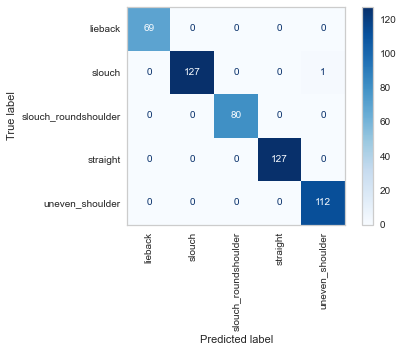

Model: rc | Train AUC Score: 1.0
Model: rc | Train Accuracy Score: 1.0
Model: rc | Test AUC Score: 0.9961240310077519
Model: rc | Test Accuracy Score: 0.9961240310077519
Model: rc | F1-Score: [1.         0.99212598 0.99378882 1.         0.99555556]



<Figure size 36000x36000 with 0 Axes>

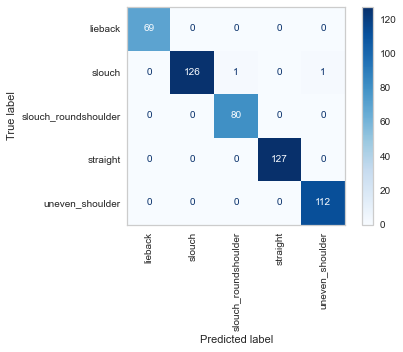

Model: rf | Train AUC Score: 1.0
Model: rf | Train Accuracy Score: 1.0
Model: rf | Test AUC Score: 1.0
Model: rf | Test Accuracy Score: 1.0
Model: rf | F1-Score: [1. 1. 1. 1. 1.]



<Figure size 36000x36000 with 0 Axes>

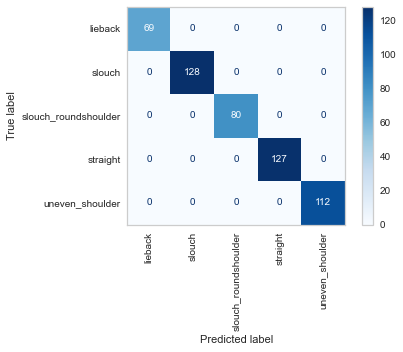

Model: gb | Train AUC Score: 1.0
Model: gb | Train Accuracy Score: 1.0
Model: gb | Test AUC Score: 1.0
Model: gb | Test Accuracy Score: 1.0
Model: gb | F1-Score: [1. 1. 1. 1. 1.]



<Figure size 36000x36000 with 0 Axes>

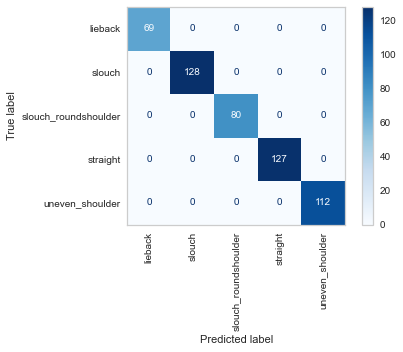

Model: ada | Train AUC Score: 0.9285714285714286
Model: ada | Train Accuracy Score: 0.9285714285714286
Model: ada | Test AUC Score: 0.9224806201550387
Model: ada | Test Accuracy Score: 0.9224806201550387
Model: ada | F1-Score: [1.         0.86153846 0.75471698 0.99212598 0.98642534]



<Figure size 36000x36000 with 0 Axes>

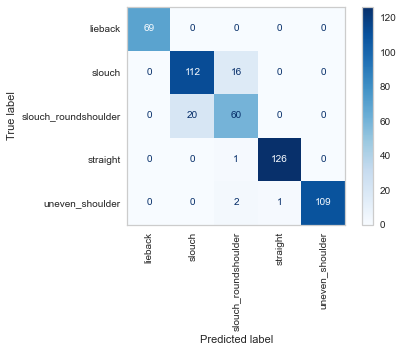

Model: dt | Train AUC Score: 1.0
Model: dt | Train Accuracy Score: 1.0
Model: dt | Test AUC Score: 0.9941860465116279
Model: dt | Test Accuracy Score: 0.9941860465116279
Model: dt | F1-Score: [1.         0.99212598 0.99378882 0.99607843 0.99107143]



<Figure size 36000x36000 with 0 Axes>

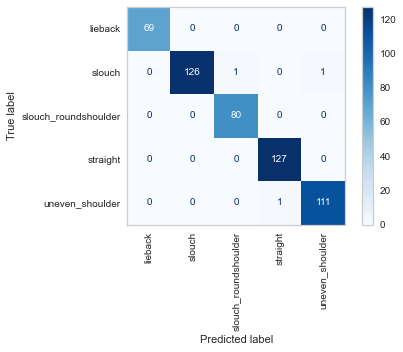

In [13]:
#create a for loop to run the x_test
for algorithm, model in fit_models.items():
    #create a variable to go thru each classifier to predict the algorithm
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    test_auc_score = model.score(X_test, y_test)
    train_auc_score = model.score(X_train, y_train)
    
    #print out the accuracy score for each classifier
    print(f"Model: {algorithm} |", f"Train AUC Score: {train_auc_score}")
    print(f"Model: {algorithm} |", f"Train Accuracy Score: {accuracy_score(y_train, train_pred)}")
    print(f"Model: {algorithm} |", f"Test AUC Score: {test_auc_score}")
    print(f"Model: {algorithm} |", f"Test Accuracy Score: {accuracy_score(y_test, pred)}") 
    print(f"Model: {algorithm} |", f"F1-Score: {f1_score(y_test, pred, average = None)}\n")
    plt.figure(figsize=(500,500));
    cf = plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.grid(False)
    plt.show()
    
#F1-score refers to 'straight', 'slouch', 'slouch_roundshoulder', 'uneven_shoulder', 'lieback' respectively

As shown above, all models except ADA have a relatively high train and test accuracy scores as well as the F1-score. As such, it is free to choose which models to use. In this case, Random Forest classifer is picked for its robustness and versatility.
Train test score: 100% and F1-score: 100% for each posture.

As models have relatively high scores and accuracy, model was not further tuned or grid search CV. Grid seach CV can be done on the pipeline whenever necessary.

### Feature Importance for Random Forest Classifier

In [93]:
pipeline_rf = Pipeline([
        ('scale', StandardScaler()),
        ('rf', RandomForestClassifier())
    ])

In [99]:
model_rf = pipeline_rf.fit(X_train, y_train)

In [100]:
modell = model_rf.named_steps['rf']

In [101]:
feature_imp = modell.feature_importances_

Text(0.5, 1.0, 'Top 20 Feature Importance')

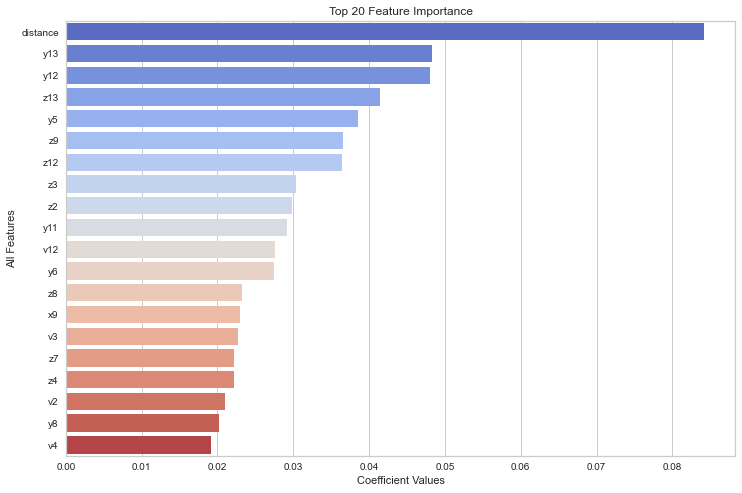

In [110]:
feature_imp_df = pd.DataFrame(index=X.columns, data=feature_imp, 
                                  columns=['coefficient']).sort_values(by='coefficient', ascending=False).head(20)
feature_imp_df.rename_axis('features', inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(data=feature_imp_df,
                y=feature_imp_df.index, x='coefficient', orient='h', palette='coolwarm')
plt.xlabel('Coefficient Values')
plt.ylabel('All Features')
plt.title('Top 20 Feature Importance')

Above is the top 3 key predictors for the model to classify a posture:
- Distance
- y13 (Right Shoulder)
- y12 (Left Shoulder)

This is expected as straight, slouch and lieback has different eye closeness to laptop screen and shoulders to determine the uneven shoulder in general.

### Export trained random forest model

In [14]:
with open('new_webcam_rf_model_3.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

### Instatiating PyCaret

In [104]:
pycaret_webcam = setup(webcam_df, target ='posture', normalize = True, session_id =42)
best_model = compare_models()

For PyCaret, observed that majority of the models have very high accuracy and F1 scores of ~99%. In this case, extra trees classifier is chosen to be exported for prediction.

In [105]:
webcam_et = create_model('et')

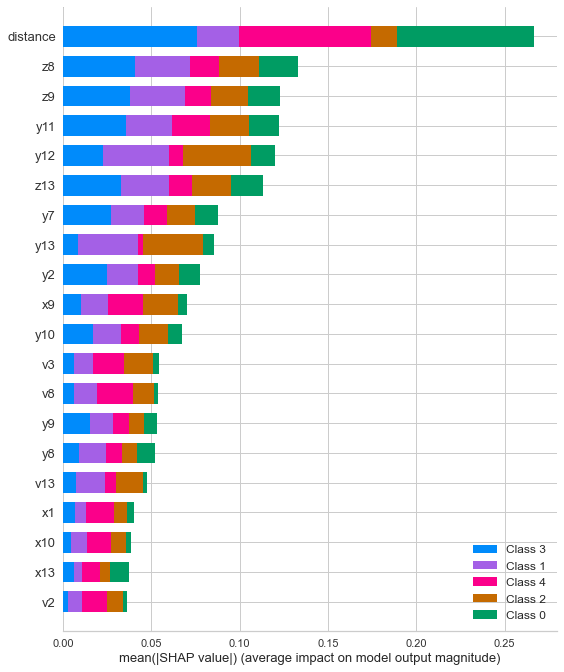

In [106]:
interpret_model(webcam_et)

Similar to manual modelling, PyCaret also identified distance as top key predictor for classifying a posture followed by left ear and right ear

Class 0: Straight

Class 1: Slouch

Class 2: Slouch Round Shoulder

Class 3: Uneven Shoulder

Class 4: Lieback

### Export trained PyCaret Model

In [107]:
with open('new_webcam_et_pycaret_model.pkl', 'wb') as f:
    pickle.dump(webcam_et, f)

Next, we proceed to visualise model in OpenCV. Refer to Capstone-AIMultiPoseMovenet-SittingPosture-Model-Visualisation notebook.